### Bellabeat Case Study: Smart Device Usage Analysis
 Author: Divya Sharma
 Tools: R, Tableau
 Dataset: Fitbit Fitness Tracker Data

This case study follows the Analytics process:
**Ask, Prepare, Process, Analyze, and Share**.

## Ask

### Business Task 
Analyze smart device usage data to understand how consumers use fitness
tracking features and identify opportunities for Bellabeat to improve
its marketing strategy.

### Key Stakeholders
- Bellabeat marketing team
- Bellabeat leadership team

### Key Questions:
- How do consumers use smart devices?
- Are there patterns by weekday vs weekend?
- Which features are used most consistently?

Data Sources 
Dataset: Fitbit Fitness Tracker Data (Kaggle)

Limitations:
Small sample size
Self-reported data
Short observation period

## PREPARE

### Data Source
The dataset used is Fitbit Fitness Tracker Data made available on Kaggle.
The data includes daily activity information collected from users over
two time periods.

### Data Organization
- Raw data stored in `raw_data/`
- Cleaned data stored in `cleaned_data/`

### Limitations
- Small sample size
- Self-reported data
- Short time span


In [1]:
# List of dataset
list.files("/kaggle/input/capstone-data")
list.files("/kaggle/input/capstone-data", recursive = TRUE)


[1] "cleaned_data" "raw_data"

[1] "cleaned_data/dailyActivity_master.csv"                  
 [2] "raw_data/3.12 - 4.11/dailyActivity_merged.csv"          
 [3] "raw_data/3.12 - 4.11/heartrate_seconds_merged.csv"      
 [4] "raw_data/3.12 - 4.11/hourlyCalories_merged.csv"         
 [5] "raw_data/3.12 - 4.11/hourlyIntensities_merged.csv"      
 [6] "raw_data/3.12 - 4.11/hourlySteps_merged.csv"            
 [7] "raw_data/3.12 - 4.11/minuteCaloriesNarrow_merged.csv"   
 [8] "raw_data/3.12 - 4.11/minuteIntensitiesNarrow_merged.csv"
 [9] "raw_data/3.12 - 4.11/minuteMETsNarrow_merged.csv"       
[10] "raw_data/3.12 - 4.11/minuteSleep_merged.csv"            
[11] "raw_data/3.12 - 4.11/minuteStepsNarrow_merged.csv"      
[12] "raw_data/3.12 - 4.11/weightLogInfo_merged.csv"          
[13] "raw_data/4.12 - 5.12/dailyActivity_merged.csv"          
[14] "raw_data/4.12 - 5.12/dailyCalories_merged.csv"          
[15] "raw_data/4.12 - 5.12/dailyIntensities_merged.csv"       
[16] "raw_data/4.12 - 5.12/dailySteps_merged.csv"             
[17] "raw_data/4.12 - 5.12/heartrate_seconds_merged.csv"      
[18] "raw_data/4.12 - 5.12/hourlyCalories_merged.csv"         
[19] "raw_data/4.12 - 5.12/hourlyIntensities_merged.csv"      
[20] "raw_data/4.12 - 5.12/hourlySteps_merged.csv"            
[21] "raw_data/4.12 - 5.12/minuteCaloriesNarrow_merged.csv"   
[22] "raw_data/4.12 - 5.12/minuteCaloriesWide_merged.csv"     
[23] "raw_data/4.12 - 5.12/minuteIntensitiesNarrow_merged.csv"
[24] "raw_data/4.12 - 5.12/minuteIntensitiesWide_merged.csv"  
[25] "raw_data/4.12 - 5.12/minuteMETsNarrow_merged.csv"       
[26] "raw_data/4.12 - 5.12/minuteSleep_merged.csv"            
[27] "raw_data/4.12 - 5.12/minuteStepsNarrow_merged.csv"      
[28] "raw_data/4.12 - 5.12/minuteStepsWide_merged.csv"        
[29] "raw_data/4.12 - 5.12/sleepDay_merged.csv"               
[30] "raw_data/4.12 - 5.12/weightLogInfo_merged.csv"

In [2]:
library(tidyverse)
library(lubridate)
library(janitor)

# Load daily activity CSVs
daily_1 <- read_csv("/kaggle/input/capstone-data/raw_data/3.12 - 4.11/dailyActivity_merged.csv")
daily_2 <- read_csv("/kaggle/input/capstone-data/raw_data/4.12 - 5.12/dailyActivity_merged.csv")

# Combining data 
daily_activity <- bind_rows(daily_1, daily_2) %>%
  clean_names() %>%
  mutate(
    activity_date = mdy(activity_date),
    total_active_minutes = very_active_minutes + fairly_active_minutes + lightly_active_minutes
  ) %>%
  distinct()


glimpse(daily_activity)
sum(is.na(daily_activity))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Rows: 457 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 940 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,397
Columns: 16
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <date> 2016-03-25, 2016-03-26, 2016-03-27, 2016-0…
$ total_steps                <dbl> 11004, 17609, 12736, 13231, 12041, 10970, 1…
$ total_distance             <dbl> 7.11, 11.55, 8.53, 8.93, 7.85, 7.16, 7.86, …
$ tracker_distance           <dbl> 7.11, 11.55, 8.53, 8.93, 7.85, 7.16, 7.86, …
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 2.57, 6.92, 4.66, 3.19, 2.16, 2.36, 2.29, 3…
$ moderately_active_distance <dbl> 0.46, 0.73, 0.16, 0.79, 1.09, 0.51, 0.49, 0…
$ light_active_distance      <dbl> 4.07, 3.91, 3.71, 4.95, 4.61, 4.29, 5.04, 3…
$ sedentary_active_distance  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0…
$ very_active_minutes        <dbl> 33, 89, 56, 39, 28, 30, 33, 47, 40, 15, 43,…
$ fairly_active_minutes      <dbl> 12, 17, 5, 20, 28, 13, 12, 21, 11, 30, 18, …
$ lightly_active

[1] 0

In [3]:
daily_activity <- daily_activity %>%
  mutate(
    weekday = wday(activity_date, label = TRUE),
    day_type = if_else(weekday %in% c("Sat", "Sun"), "Weekend", "Weekday")
  )


In [4]:
# Count number of active days per user
user_consistency <- daily_activity %>%
  group_by(id) %>%
  summarise(active_days = n())

# Merge to main data
daily_activity <- daily_activity %>%
  left_join(user_consistency, by = "id") %>%
  mutate(
    consistency_level = case_when(
      active_days >= 25 ~ "High",
      active_days >= 15 ~ "Medium",
      TRUE ~ "Low"
    )
  )

# distribution
table(daily_activity$consistency_level)



High  Low 
1380   17 

In [5]:
daily_unique <- daily_activity %>%
  group_by(id, activity_date) %>%
  slice(1) %>%
  ungroup()

In [6]:
daily_activity %>%
  group_by(day_type) %>%
  summarise(avg_steps = mean(total_steps, na.rm = TRUE))


day_type,avg_steps
<chr>,<dbl>
Weekday,7317.030
Weekend,7188.265


### AVERAGE STEPS V/S WEEKDAY OR WEEKEND

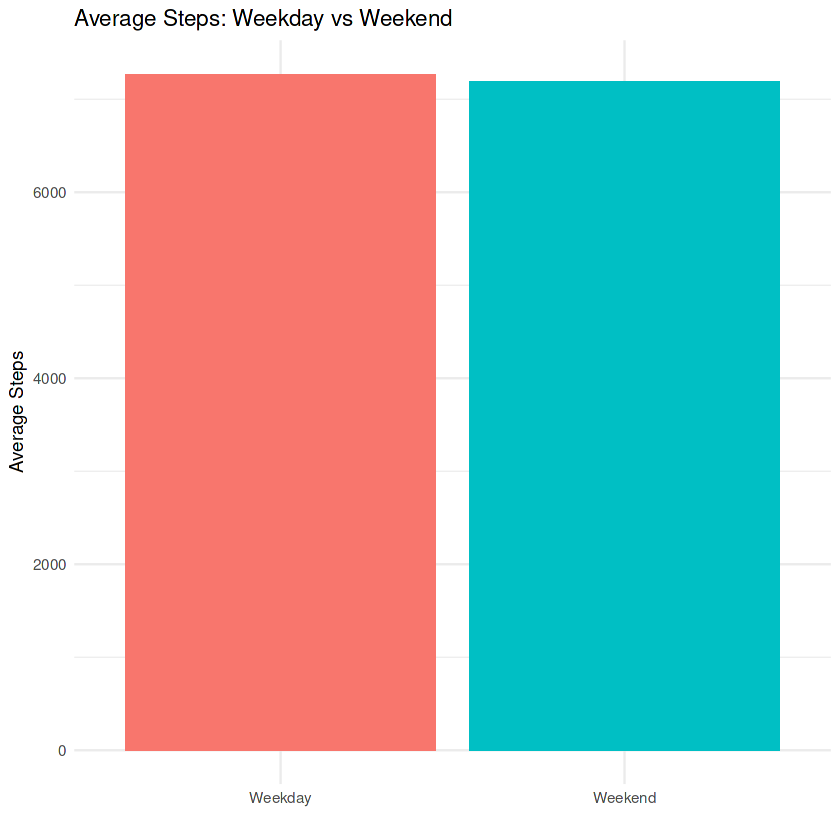

In [7]:
daily_unique %>%
  group_by(day_type) %>%
  summarise(avg_steps = mean(total_steps, na.rm = TRUE)) %>%
  ggplot(aes(x = day_type, y = avg_steps, fill = day_type)) +
  geom_col(show.legend = FALSE) +
  labs(title = "Average Steps: Weekday vs Weekend",
       x = "", y = "Average Steps") +
  theme_minimal()


### Active Minutes Consistency

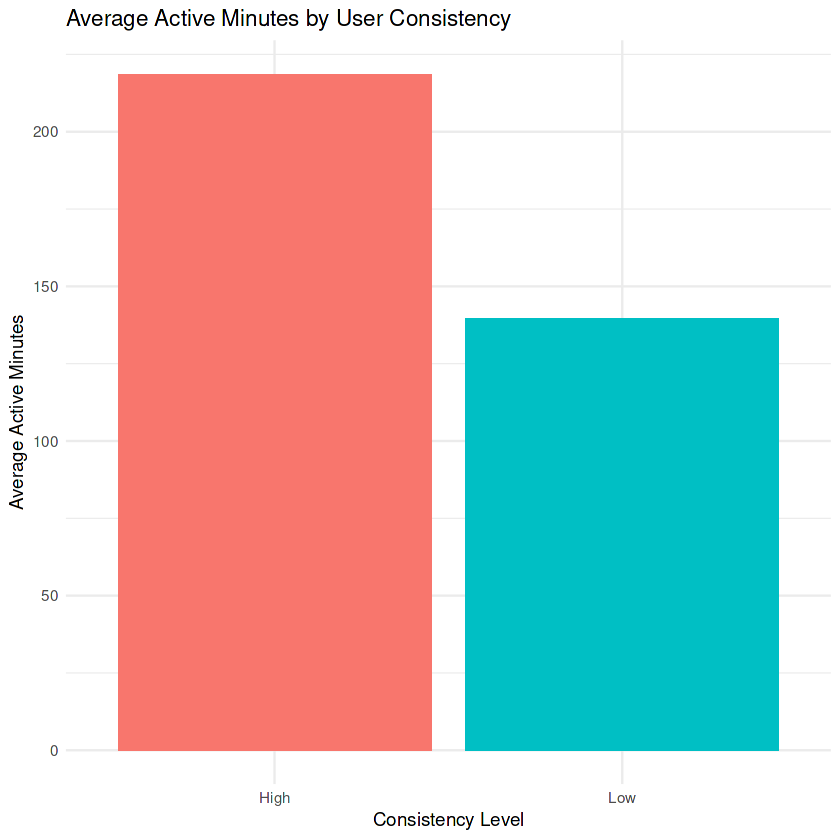

In [8]:
daily_activity <- daily_activity %>%
  group_by(id) %>%
  mutate(
    active_days = n(),
    consistency_level = case_when(
      active_days >= 25 ~ "High",
      active_days >= 15 ~ "Medium",
      TRUE ~ "Low"
    )
  ) %>%
  ungroup()
daily_unique <- daily_activity %>%
  group_by(id, activity_date) %>%
  slice(1) %>%
  ungroup()
daily_unique %>%
  group_by(consistency_level) %>%
  summarise(avg_active_minutes = mean(total_active_minutes, na.rm = TRUE)) %>%
  ggplot(aes(x = consistency_level, y = avg_active_minutes, fill = consistency_level)) +
  geom_col(show.legend = FALSE) +
  labs(title = "Average Active Minutes by User Consistency",
       x = "Consistency Level", y = "Average Active Minutes") +
  theme_minimal()

In [9]:
sleep <- read_csv("/kaggle/input/capstone-data/raw_data/4.12 - 5.12/sleepDay_merged.csv") %>%
  clean_names() %>%
  mutate(sleep_date = mdy(sleep_day))

glimpse(sleep)

Rows: 413 Columns: 5


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `sleep_date = mdy(sleep_day)`.
Caused by warning:
! All formats failed to parse. No formats found.”


Rows: 413
Columns: 6
$ id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ sleep_day            <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM",…
$ total_sleep_records  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ total_minutes_asleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430,…
$ total_time_in_bed    <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449,…
$ sleep_date           <date> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …


In [10]:
library(tidyverse)
library(lubridate)
library(janitor)

# Load sleep data
sleep <- read_csv("/kaggle/input/capstone-data/raw_data/4.12 - 5.12/sleepDay_merged.csv") %>%
  clean_names() %>%
  mutate(
    sleep_date = mdy(sleep_day),
    weekday = wday(sleep_date, label = TRUE),
    day_type = if_else(weekday %in% c("Sat", "Sun"), "Weekend", "Weekday")
  )

glimpse(sleep)

Rows: 413 Columns: 5


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `sleep_date = mdy(sleep_day)`.
Caused by warning:
! All formats failed to parse. No formats found.”


Rows: 413
Columns: 8
$ id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ sleep_day            <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM",…
$ total_sleep_records  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ total_minutes_asleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430,…
$ total_time_in_bed    <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449,…
$ sleep_date           <date> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ weekday              <ord> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ day_type             <chr> "Weekday", "Weekday", "Weekday", "Weekday", "Week…


In [11]:
# Summary
summary(sleep$total_minutes_asleep)

# Average sleep by weekday vs weekend
sleep %>%
  group_by(day_type) %>%
  summarise(avg_sleep = mean(total_minutes_asleep, na.rm = TRUE))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   58.0   361.0   433.0   419.5   490.0   796.0 

day_type,avg_sleep
<chr>,<dbl>
Weekday,419.4673


### Sleep Duration Distribution

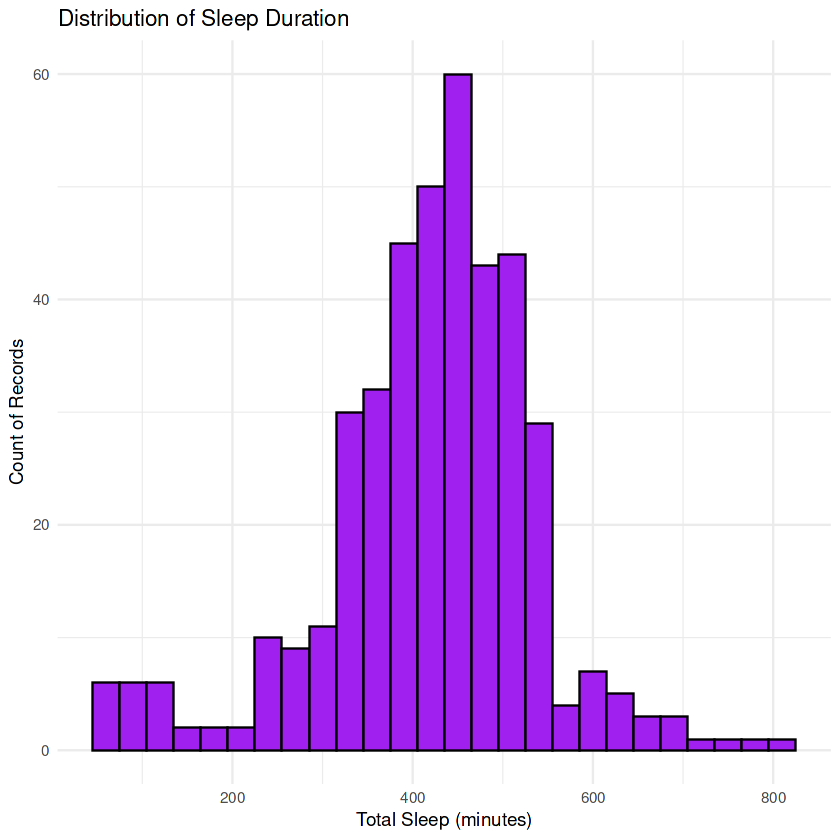

In [12]:
ggplot(sleep, aes(x = total_minutes_asleep)) +
  geom_histogram(binwidth = 30, fill = "purple", color = "black") +
  labs(
    title = "Distribution of Sleep Duration",
    x = "Total Sleep (minutes)",
    y = "Count of Records"
  ) +
  theme_minimal()

In [13]:
sleep <- sleep %>%
  mutate(
    sleep_date = mdy_hms(sleep_day),  
    sleep_date = as_date(sleep_date)   
  )
sleep_activity <- sleep %>%
  left_join(daily_activity, by = c("id" = "id", "sleep_date" = "activity_date"))

# How many rows have activity data?
sum(!is.na(sleep_activity$total_active_minutes))

Warning message in left_join(., daily_activity, by = c(id = "id", sleep_date = "activity_date")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 893 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


[1] 425

In [14]:
sleep_unique <- sleep %>%
  group_by(id, sleep_date) %>%
  slice(1) %>%  # take first record if multiple
  ungroup()
daily_unique <- daily_activity %>%
  group_by(id, activity_date) %>%
  slice(1) %>%  # keep first row per day per user
  ungroup()
sleep_activity_clean <- sleep_unique %>%
  left_join(daily_unique, by = c("id" = "id", "sleep_date" = "activity_date")) %>%
  filter(!is.na(total_active_minutes))  # keep only rows with activity

### Sleep vs Activity

`geom_smooth()` using formula = 'y ~ x'


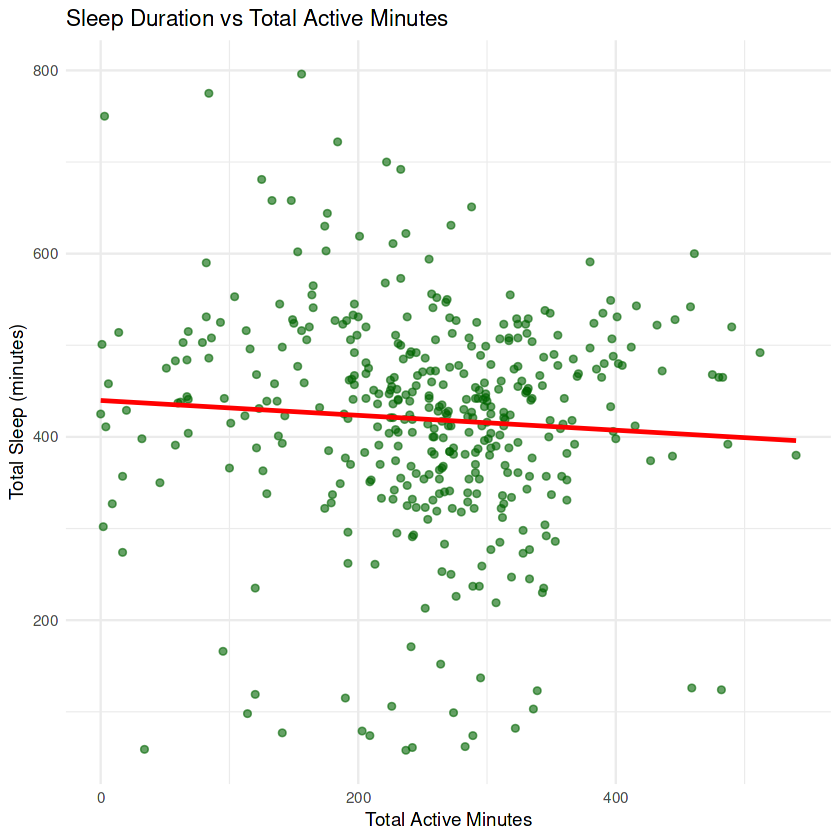

In [15]:
ggplot(sleep_activity_clean, aes(x = total_active_minutes, y = total_minutes_asleep)) +
  geom_point(alpha = 0.6, color = "darkgreen") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(
    title = "Sleep Duration vs Total Active Minutes",
    x = "Total Active Minutes",
    y = "Total Sleep (minutes)"
  ) +
  theme_minimal()

In [16]:
# Always load libraries first
library(tidyverse)
library(lubridate)
library(janitor)
# --- Load Hourly Steps Data ---
hourly_steps <- read_csv(
  "/kaggle/input/capstone-data/raw_data/4.12 - 5.12/hourlySteps_merged.csv",
  show_col_types = FALSE
) %>%
  clean_names() %>%
  mutate(
    activity_datetime = mdy_hms(activity_hour),
    hour = hour(activity_datetime)
  )

glimpse(hourly_steps)

Rows: 22,099
Columns: 5
$ id                <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503…
$ activity_hour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/…
$ step_total        <dbl> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 2…
$ activity_datetime <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-1…
$ hour              <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…


In [17]:
hourly_avg <- hourly_steps %>%
  group_by(id, hour) %>%
  summarise(avg_steps = mean(step_total, na.rm = TRUE)) %>%
  ungroup()

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


In [18]:
user_peak_hour <- hourly_avg %>%
  group_by(id) %>%
  slice_max(avg_steps, n = 1, with_ties = FALSE) %>%
  ungroup()

glimpse(user_peak_hour)


Rows: 33
Columns: 3
$ id        <dbl> 1503960366, 1624580081, 1644430081, 1844505072, 1927972279, …
$ hour      <int> 18, 10, 19, 11, 11, 9, 15, 15, 8, 8, 10, 22, 16, 8, 10, 6, 1…
$ avg_steps <dbl> 1556.1000, 659.5161, 1199.6897, 263.1333, 142.9355, 1916.161…


In [19]:
user_peak_hour <- user_peak_hour %>%
  mutate(
    time_window = case_when(
      hour >= 17 & hour <= 19 ~ "5–7 PM",
      hour >= 12 & hour < 17 ~ "12–5 PM",
      hour >= 7  & hour < 12 ~ "7 AM–12 PM",
      TRUE ~ "Other"
    )
  )


In [20]:
peak_distribution <- user_peak_hour %>%
  count(time_window) %>%
  mutate(percentage = round(n / sum(n) * 100, 1))

peak_distribution


time_window,n,percentage
<chr>,<int>,<dbl>
12–5 PM,10,30.3
5–7 PM,6,18.2
7 AM–12 PM,14,42.4
Other,3,9.1


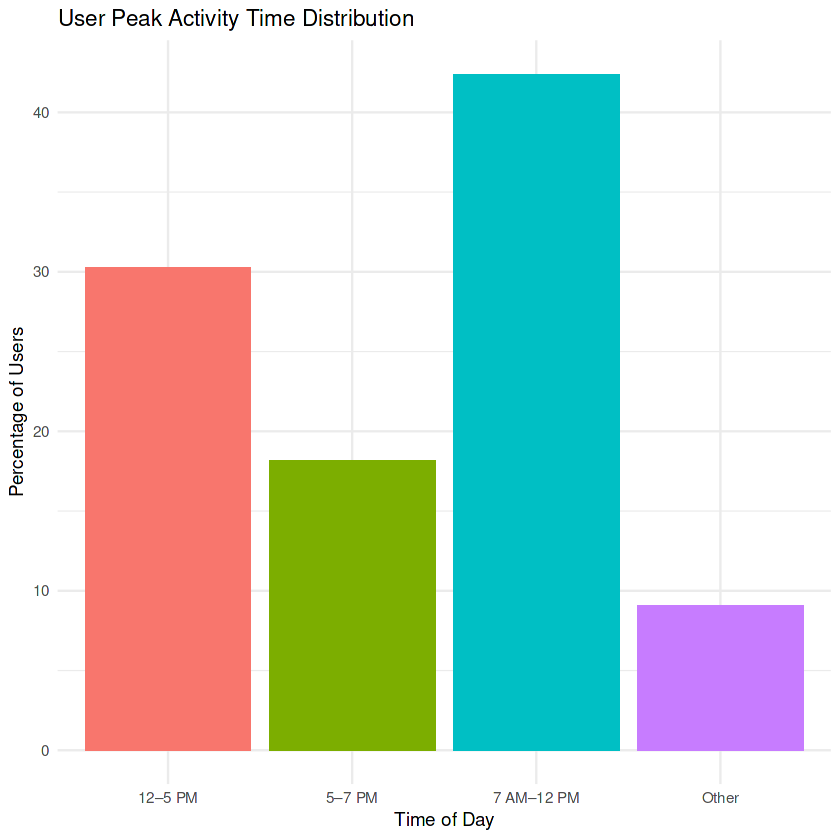

In [21]:
ggplot(peak_distribution, aes(x = time_window, y = percentage, fill = time_window)) +
  geom_col(show.legend = FALSE) +
  labs(
    title = "User Peak Activity Time Distribution",
    x = "Time of Day",
    y = "Percentage of Users"
  ) +
  theme_minimal()


In [22]:
write_csv(user_peak_hour, "user_peak_activity_hour.csv")


### Merging Sleep and Activity Data

To explore the relationship between **sleep duration** and **daily activity**, I needed to combine two datasets:

1. `sleepDay_merged.csv` — contains sleep records for each user per day.
2. `dailyActivity_master.csv` — contains daily activity metrics (steps, active minutes, calories, etc.).

merged them using:

```r
sleep_activity <- sleep %>%
  left_join(daily_activity, by = c("id" = "id", "sleep_date" = "activity_date"))


### Observations
Some users had multiple sleep records per day (total_sleep_records > 1)
Some users had duplicate activity entries per day.

This resulted in a many-to-many relationship, which R warns about:
“Detected an unexpected many-to-many relationship between x and y.”
Many rows after the merge had NA in total_active_minutes, meaning no matching activity data existed for those sleep records.

How To Handled It:
Deduplicated sleep records per user per day — kept only the first record.
Deduplicated daily activity records per user per day — kept only the first record.
Filtered out rows with missing activity data before plotting.

## Key Insights
### Activity Patterns
Users are slightly more active on weekdays (average ~7,317 steps) than on weekends (average ~7,188 steps), indicating more consistent movement during workdays.

Activity levels peak midweek (Tuesday–Thursday), suggesting routines are strongest during standard work schedules.

Hourly activity analysis shows that the majority of users reach peak step counts during the morning hours (7 AM–12 PM), representing 42.4% of users, followed by afternoon activity (12 PM–5 PM, 30.3%). Evening activity (5 PM–7 PM) is lower, at 18.2%, highlighting morning as the key engagement period.

### Feature Usage Consistency
Most users log activity regularly, but only a small subset demonstrate high consistency (25+ active days), indicating room to improve long-term engagement.

Step tracking is the most consistently used feature, while sleep tracking shows greater variability across users.

### Sleep Patterns
Average sleep duration is approximately 419 minutes (~7 hours) on weekdays, aligning with general sleep recommendations.

A weak positive correlation exists between active minutes and sleep duration, suggesting that more active days are associated with slightly longer sleep, though the relationship is not strong.

### Recommendations for Bellabeat
Push Notification Timing

Schedule activity reminders during morning hours (7 AM–12 PM), when users are most active.

Send weekday-focused notifications to reinforce existing routines, complemented by weekend-specific nudges to reduce drops in activity consistency.

### Feature Focus
Prioritize step-based challenges, streaks, and rewards, as step tracking is already the most consistently used feature.

Promote sleep tracking to less consistent users by pairing it with simple insights and actionable tips for improving rest.

### Marketing Suggestions
Target users with low and medium consistency segments using personalized wellness programs and in-app encouragement.

Use clear visual summaries (weekly activity trends, streaks, and milestones) to reinforce positive behavior.

Launch midweek campaigns (Tuesday–Thursday) to capitalize on peak engagement and reinforce habitual device usage.

Tableau dashboad link : 
https://public.tableau.com/views/BellabeatSmartDeviceUsageAnalysis_17676757815660/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link